## Exercise 0

In [ ]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")

df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               121 non-null    int64  
 1   Month              121 non-null    int64  
 2   Quantity           121 non-null    int64  
 3   Quantity_YoY       121 non-null    int64  
 4   Import             121 non-null    int64  
 5   Import_YoY         121 non-null    int64  
 6   Used               61 non-null     float64
 7   Used_YoY           49 non-null     float64
 8   Avg_CO2            121 non-null    int64  
 9   Bensin_Co2         121 non-null    int64  
 10  Diesel_Co2         121 non-null    int64  
 11  Quantity_Diesel    121 non-null    int64  
 12  Diesel_Share       121 non-null    float64
 13  Diesel_Share_LY    121 non-null    float64
 14  Quantity_Hybrid    73 non-null     float64
 15  Quantity_Electric  73 non-null     float64
 16  Import_Electric    53 non-

In [6]:
df.describe()

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,61.000000,49.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,73.000000,73.000000,53.000000
mean,2011.545455,6.454545,11134.297521,392.586777,2204.371901,-135.049587,36864.737705,973.122449,129.520661,133.735537,141.396694,6582.355372,60.512397,62.278512,1255.219178,1154.109589,306.924528
std,2.915476,3.488075,1752.046397,1789.539953,573.127896,545.395787,4230.548664,2728.915662,22.719338,17.094233,10.847795,1596.675812,15.802049,13.128647,1059.443502,875.792142,165.086906
min,2007.000000,1.000000,5353.000000,-4548.000000,1048.000000,-1810.000000,24106.000000,-6261.000000,84.000000,94.000000,118.000000,3422.000000,26.300000,38.000000,159.000000,43.000000,33.000000
25%,2009.000000,3.000000,10250.000000,-526.000000,1812.000000,-495.000000,34212.000000,-392.000000,110.000000,120.000000,133.000000,5434.000000,48.500000,49.400000,443.000000,309.000000,197.000000
50%,2012.000000,6.000000,11385.000000,493.000000,2263.000000,-114.000000,37079.000000,855.000000,132.000000,131.000000,136.000000,6583.000000,68.700000,68.700000,899.000000,1260.000000,286.000000
75%,2014.000000,9.000000,12337.000000,1445.000000,2625.000000,162.000000,39797.000000,2708.000000,151.000000,150.000000,151.000000,7808.000000,73.700000,74.000000,1556.000000,1906.000000,433.000000
max,2017.000000,12.000000,14207.000000,5227.000000,3768.000000,1334.000000,44106.000000,5896.000000,162.000000,165.000000,166.000000,10072.000000,81.400000,81.400000,4419.000000,3391.000000,746.000000


# b)

<Axes: xlabel='Year'>

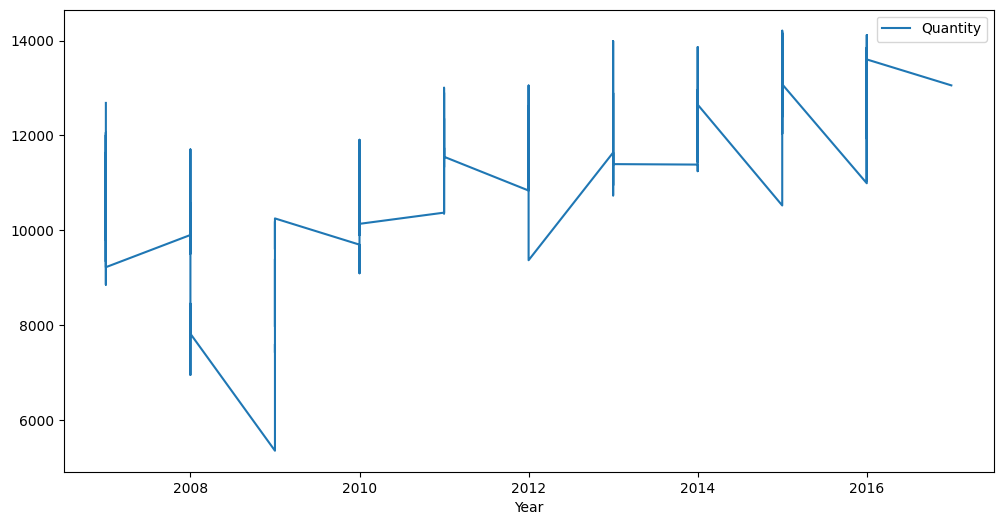

In [11]:
df.plot(x="Year", y="Quantity", figsize=(12,6))

In [18]:
import duckdb

df_yearly_quant = duckdb.query("""--sql
             SELECT 
                Year,
                SUM(Quantity) AS Quantity
             FROM
                df
             GROUP BY 
                year
             ORDER BY
                year
             """).df()

<Axes: xlabel='Year'>

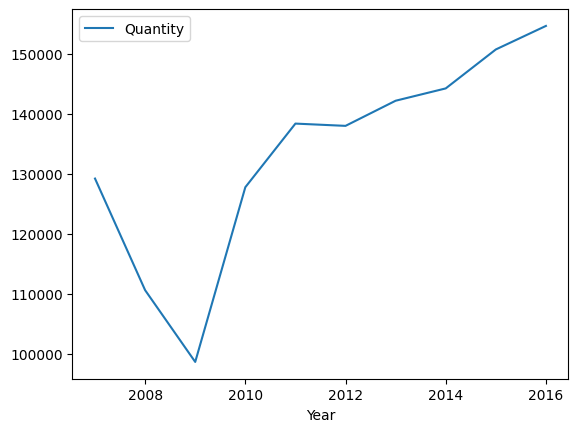

In [21]:
df_yearly_quant.iloc[:-1].plot(x="Year", y="Quantity")

# C)

In [26]:
df_co2 = duckdb.query("""--sql
             SELECT 
                year,
                SUM(avg_CO2) AS avg_CO2
             FROM
                df
             GROUP BY 
                year
             ORDER BY 
                year""").df()

<Axes: xlabel='Year'>

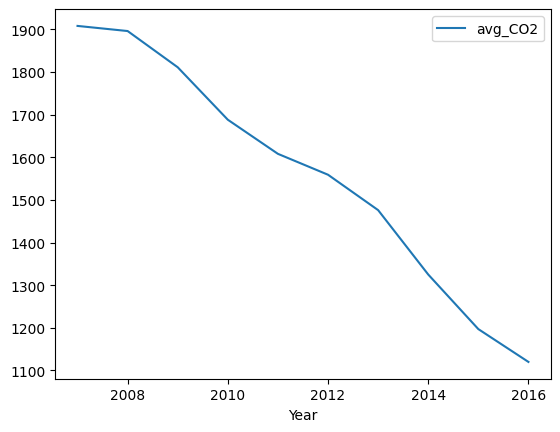

In [27]:
df_co2.iloc[:-1].plot(x="Year", y="avg_CO2")

# D)

In [34]:
monthly_import = duckdb.query("""--sql
        SELECT 
             year || '-' || LPAD(CAST(month as VARCHAR), 2, '0') AS date,
             import
        from
             df         
    """).df()

<Axes: xlabel='date'>

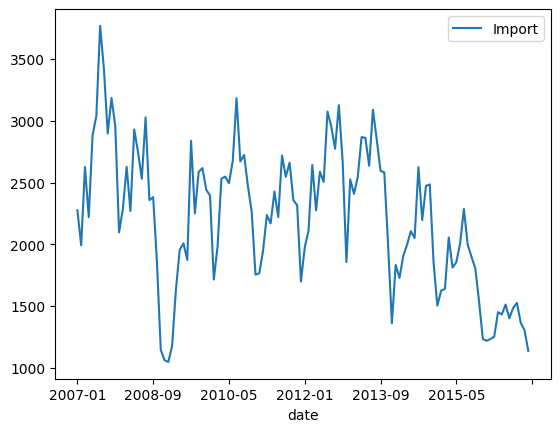

In [37]:
monthly_import.iloc[:-1].plot(x="date", y="Import")

## E)

In [44]:
monthly_CO2 = duckdb.query("""--sql
        SELECT 
             year || '-' || LPAD(CAST(month as VARCHAR), 2, '0') AS date,
             Avg_CO2
        from
             df         
    """).df()

<Axes: xlabel='date'>

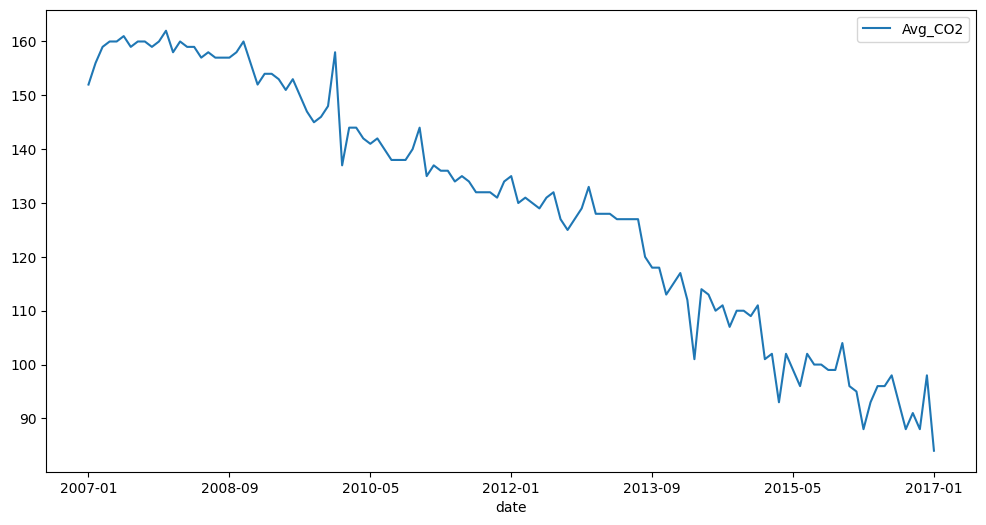

In [46]:
monthly_CO2.plot(x="date", y="Avg_CO2", figsize=(12, 6))

## f)

In [49]:
monthly_electric = duckdb.query("""--sql
        SELECT 
             year || '-' || LPAD(CAST(month as VARCHAR), 2, '0') AS date,
             Import_Electric
        from
             df         
    """).df()

<Axes: xlabel='date'>

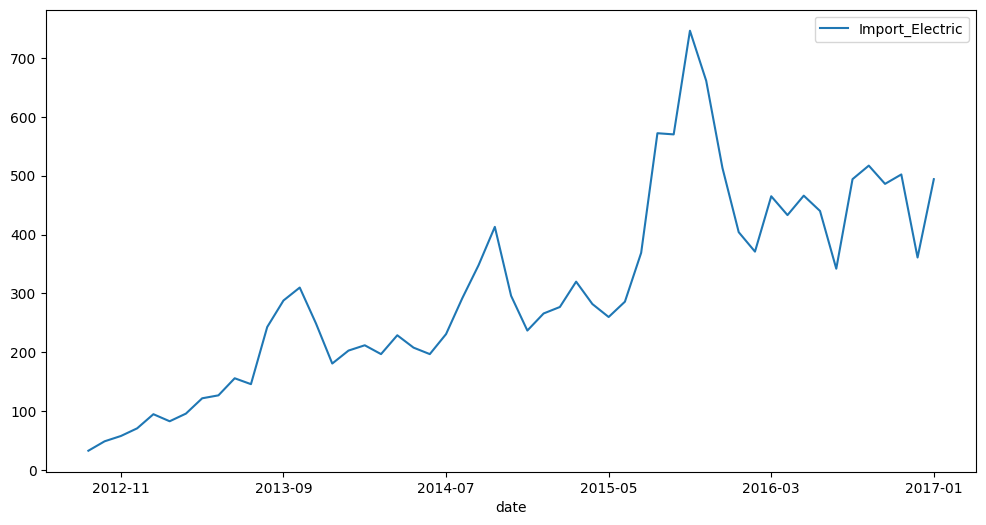

In [57]:
monthly_electric.plot(x="date", y="Import_Electric", figsize=(12,6))

## G)

In [88]:
yearly_diesel_share = duckdb.query("""--sql
        SELECT 
             year,
             SUM(Diesel_Share) AS Diesel_Share
        from
             df
          GROUP BY year
          ORDER BY year
    """).df()

<Axes: xlabel='Year'>

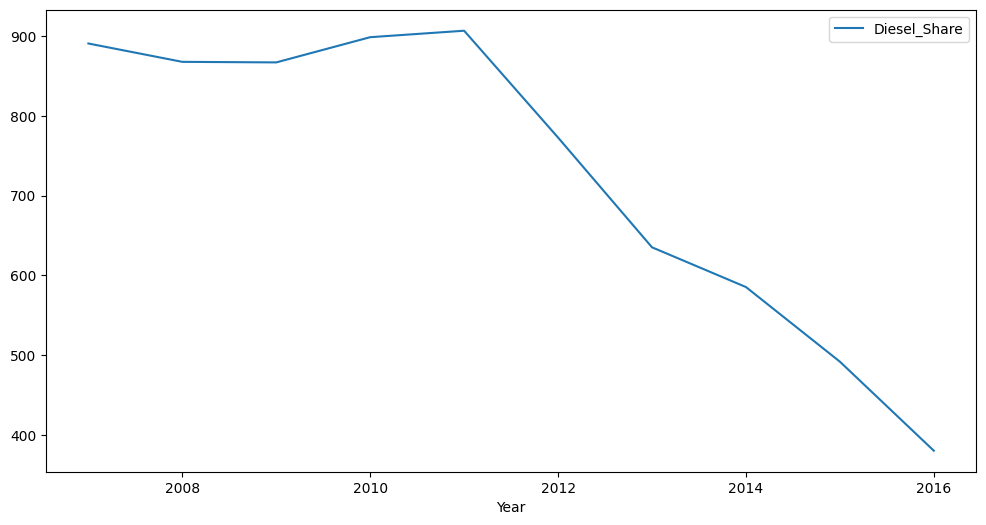

In [89]:
yearly_diesel_share.iloc[:-1].plot(x="Year", y="Diesel_Share", figsize=(12,6))

## 1. Recreate graphs

In [ ]:
df_steam = pd.read_csv("data/Steam_Top_100_Played_Games.csv")

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."
...,...,...,...,...,...,...,...,...
95,96,Sid Meier's Civilization® V,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/8930/Sid_Me...,£19.99,"17,916","21,754","Turn-Based Strategy, Strategy, Turn-Based, Mul..."
96,97,Counter-Strike,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/10/CounterS...,£7.19,"17,900","19,275","Action, FPS, Multiplayer, Shooter, Classic, Te..."
97,98,Cities: Skylines,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/255710/Citi...,£24.99,"17,866","18,067","City Builder, Simulation, Building, Management..."
98,99,Fallout 4,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/377160/Fall...,£15.99,"17,009","20,939","Open World, Post-apocalyptic, Singleplayer, RPG"


In [92]:
import matplotlib.pyplot as plt
df_steam

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."
...,...,...,...,...,...,...,...,...
95,96,Sid Meier's Civilization® V,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/8930/Sid_Me...,£19.99,"17,916","21,754","Turn-Based Strategy, Strategy, Turn-Based, Mul..."
96,97,Counter-Strike,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/10/CounterS...,£7.19,"17,900","19,275","Action, FPS, Multiplayer, Shooter, Classic, Te..."
97,98,Cities: Skylines,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/255710/Citi...,£24.99,"17,866","18,067","City Builder, Simulation, Building, Management..."
98,99,Fallout 4,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/377160/Fall...,£15.99,"17,009","20,939","Open World, Post-apocalyptic, Singleplayer, RPG"


In [ ]:
df_steam["Current Players"] = df_steam["Current Players"].str.replace(",", "").astype(int)

AttributeError: Can only use .str accessor with string values!

In [120]:
df_steam["Price"] = df_steam["Price"].str.replace("£", "")

In [122]:
df_steam["Price"] = df_steam["Price"].str.replace("Free To Play", "0").astype(float)

In [123]:
df_steam

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,0.00,1485535,"1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,0.00,765150,"765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,0.00,698757,"715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,0.00,312427,"565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,23.93,258475,"288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."
...,...,...,...,...,...,...,...,...
95,96,Sid Meier's Civilization® V,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/8930/Sid_Me...,19.99,17916,"21,754","Turn-Based Strategy, Strategy, Turn-Based, Mul..."
96,97,Counter-Strike,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/10/CounterS...,7.19,17900,"19,275","Action, FPS, Multiplayer, Shooter, Classic, Te..."
97,98,Cities: Skylines,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/255710/Citi...,24.99,17866,"18,067","City Builder, Simulation, Building, Management..."
98,99,Fallout 4,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/377160/Fall...,15.99,17009,"20,939","Open World, Post-apocalyptic, Singleplayer, RPG"


In [126]:
steam_players = duckdb.query("""--sql
             SELECT 
                name,
                "Current Players",
               Price
             from 
                df_steam
             order by "Current Players"
            DESC
                
             """).df()

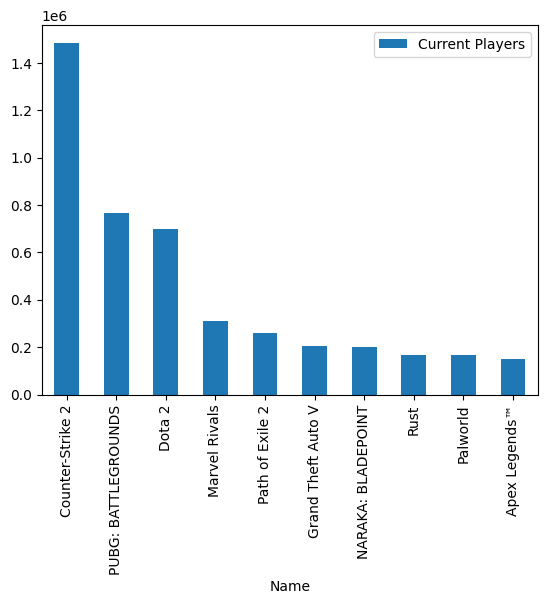

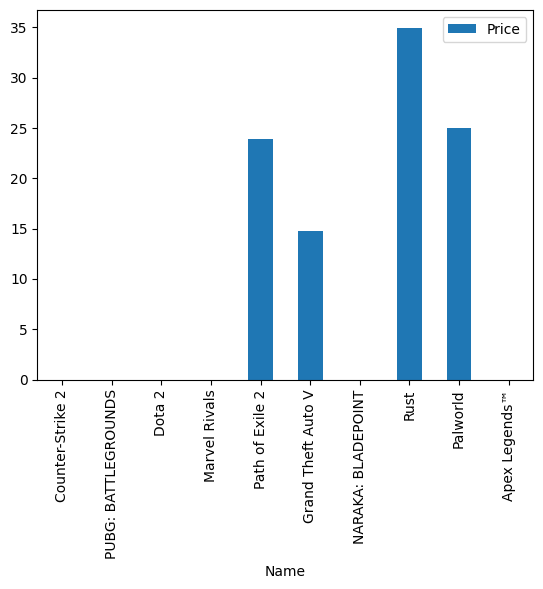

In [ ]:
steam_players.iloc[:10].plot(kind="bar",x="Name", y="Current Players")
steam_players.iloc[:10].plot(kind="bar", x="Name", y="Price")

In [135]:
steam_players_top10 = steam_players.iloc[:10]


In [144]:
steam_players_top10_played = steam_players_top10.drop(["Price"], axis=1).set_index(["Name"])
steam_players_top10_price = steam_players_top10.drop(["Current Players"], axis=1).set_index(["Name"])

In [272]:
def top_games(ax):
    ax = steam_players_top10_played.plot(kind="bar", ax=ax)
    arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle="arc3, rad=.3")
    arrowprops2 = dict(arrowstyle = "->", linewidth = 2, connectionstyle="arc3, rad=-.1")
    ax.annotate(text = "Most popular games are free", xy=(0.25, 1100000), arrowprops=arrowprops, xytext=(1, 1000000 ))
    ax.annotate(text = "", xy=(1, 770000), arrowprops=arrowprops, xytext=(1.2, 950000 ))
    ax.annotate(text = "", xy=(2, 750000), arrowprops=arrowprops, xytext=(1.9, 950000 ))
    ax.annotate(text = "", xy=(3, 350000), arrowprops=arrowprops2, xytext=(3, 950000 ))
    ax.set_title("Number of players for most popular games in Steam")



Text(3, 950000, '')

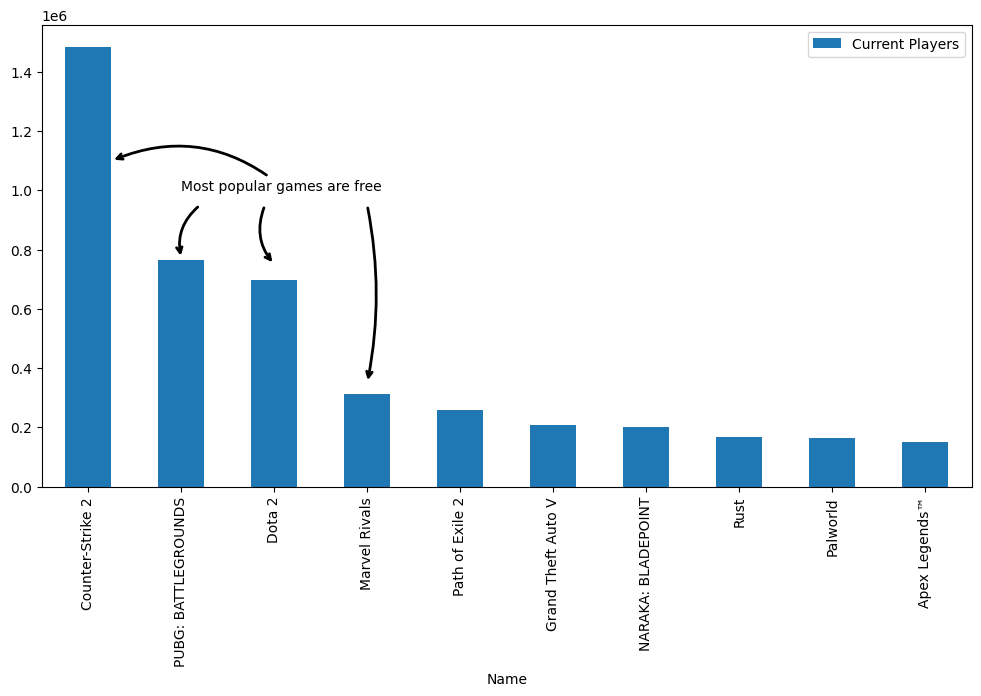

In [240]:
fig, ax = top_games()

arrowprops = dict(arrowstyle = "->", linewidth = 2, connectionstyle="arc3, rad=.3")
arrowprops2 = dict(arrowstyle = "->", linewidth = 2, connectionstyle="arc3, rad=-.1")
ax.annotate(text = "Most popular games are free", xy=(0.25, 1100000), arrowprops=arrowprops, xytext=(1, 1000000 ))
ax.annotate(text = "", xy=(1, 770000), arrowprops=arrowprops, xytext=(1.2, 950000 ))
ax.annotate(text = "", xy=(2, 750000), arrowprops=arrowprops, xytext=(1.9, 950000 ))
ax.annotate(text = "", xy=(3, 350000), arrowprops=arrowprops2, xytext=(3, 950000 ))

In [271]:
def top_games_price(ax):
    ax = steam_players_top10_price.plot(kind="bar", ax=ax)
    ax.annotate(text="no bars --> free to play", xy=(1, 1), xytext=(0, 4))
    ax.set_title("Price in pounds for the most popular games on Steam")
    

    



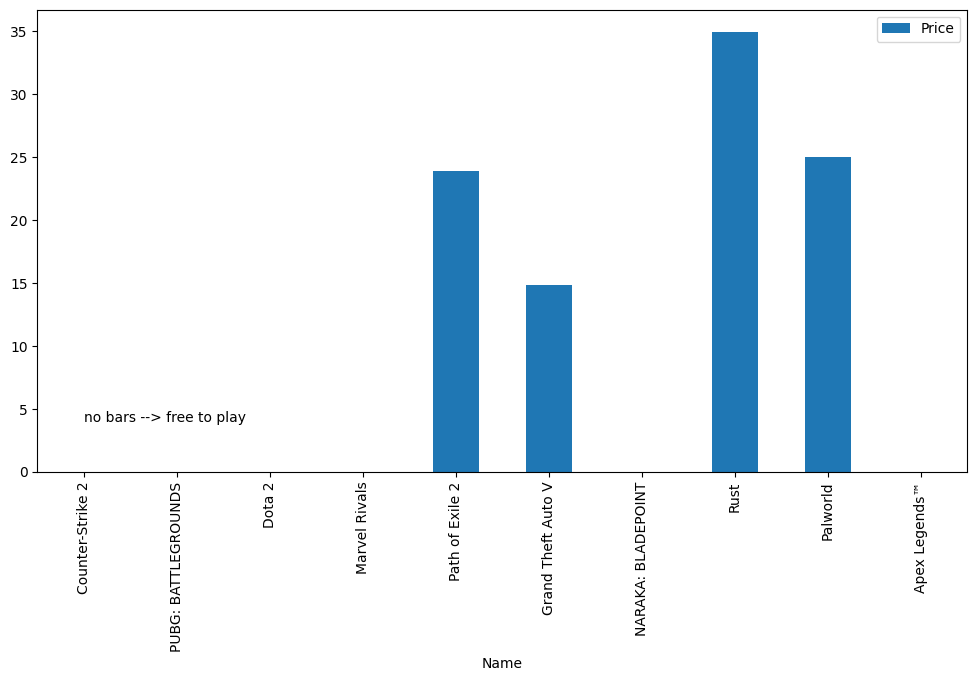

In [256]:
fig, ax = top_games_price()



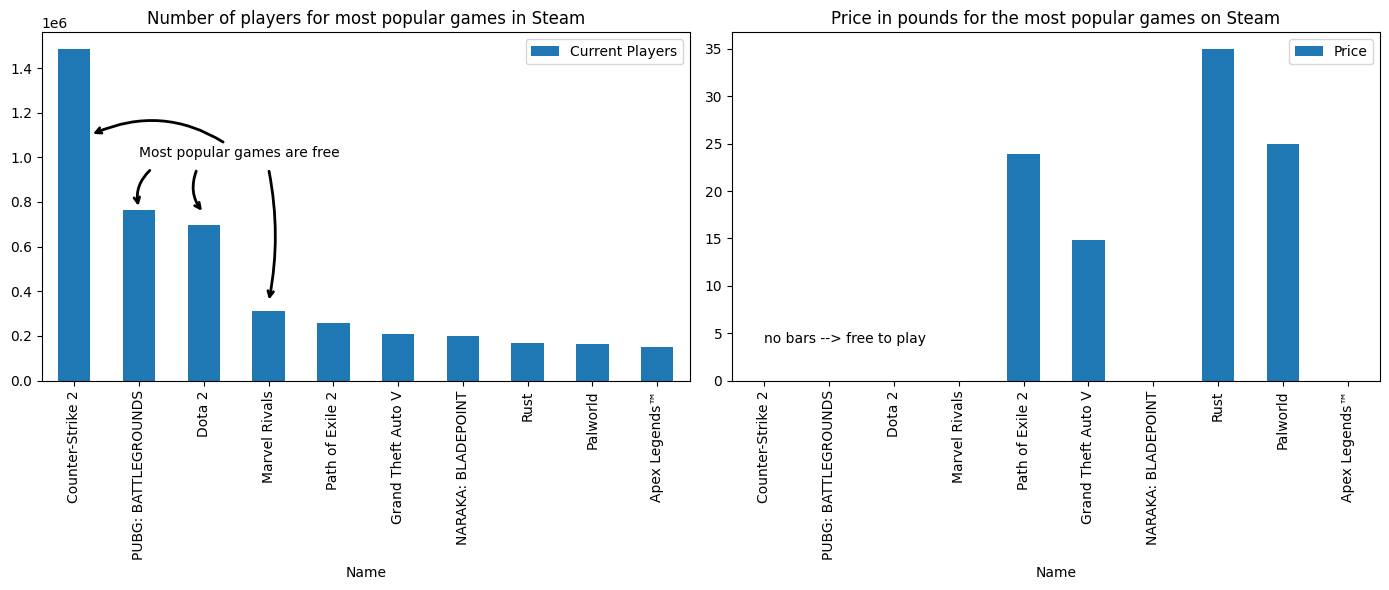

In [281]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

top_games(ax1)
top_games_price(ax2)

plt.tight_layout()
fig.savefig("figures/subplot_ex0_1.png")

